# I: Literature Reading

> The purpose of this part of the project is to understand the concept and the skills on Merkle tree, hash collision, and hash puzzle. It also practices literature review skills. In the end, you need to list references that cover these concepts and their latest development. The minimum number of the reference list is three. It is no harm to list more. Along with each reference, you need give a paragraph briefing the main ideas. Note, reference here is meant for any materials that help you understand the concepts and progress the projects. They can be a book chapter, a peer reviewed journal or conference paper or a source from the internet.

I list the following three references that can be your starting points. All of them are posted for your
convenience. You cannot use them as your references.

R1: B. Weber and X. Zhang. Parallel hash collision search by rho method with distinguished points. Proc.
of the 14th IEEE LISAT 2018, Farmingdale, NY, May 4, 2018, pp. 1-7

R2: Mark Stamp book (listed in the course syllabus), section 5.2 (Birthday attack, Nostradamus attack)
and 5.3 (MD4).

R3: J. Kelsey and T. Kohno, Herding hash functions and the Nostradamus attack,
eprint.iacr.org/2005/28l.pdf; It is posted in the assignment folder.


Merkle Tree:

A Merkle tree, also known as a hash tree, and is designed to verify the integrity of data efficiently and securely. This is a tree-like structure where a cryptographic hash function  is utilized to generate a hash of a data block, thus creating a leaf node. Also, there are non-leaf nodes which contains the hash of its child nodes’ hashes. This all ensures the data is consistent and prevents tampering.

The following are some key properties related to Merkle trees: efficient verification, data integrity, and tamper detection. 

* Efficient verification in the Merkle trees provides a way to efficiently verify data integrity without the need to download the entire dataset. 
* Data integrity is achieved in Merkle trees as it uses the cryptographic hash functions to signal if there is/was any tampering of the data.
* Tamper detection can be accomplished in Merkle trees by comparing that hash values.

Hash Collision:

A hash collision is an occurrence where two different data blocks produce the exact same hash value. This can be a major security concern because it opens the possibility for an attacker to forge digital signatures or create fraudulent messages.

There are two types of hash collisions, a weak or strong collision. A weak collision happens when two different data sets produce the same hash value, but the attacker is unable to find another data block that produces the same hash value. A strong collision occurs when two different data sets produce the same hash value, and the attacker is able to find another data block that produces the same hash value.

There are many ways to prevent hash collisions, but a couple of examples are to increase the output size of the hash function, or to use salting. When the hash function output size is increased it is reducing the likelihood of collisions to occur. When using the salting process, it adds a random string to the input prior to hashing. Thus, making it more difficult to find two inputs that would produce the same hash value. 

Hash Puzzle:

A Hash puzzle is a computational problem that miners solve on blockchains to add their block to the chain. This is also a process that requires a significant amount of computational power to solve. The puzzles are used to secure the blockchain networks and provide a mechanism to prevent malicious actors from adding counterfeit transactions to the blockchain.

In hash puzzles, a hash value is created by utilizing a random nonce which is then hashed with the other data, such as the previous data block in the blockchain. The ultimate goal of the puzzle is to find a nonce that creates a hash value with a certain number of leading zeros. This process is computationally difficult because there isn’t a way to determine which nonce will produce the desired hash value.

References
* Becker, G. (2018, 07 08). Merkle Signature Schemes, Merkle Trees and Their Cryptanalysis. Retrieved from https://web.archive.org/web/20141222120036/http://www.emsec.rub.de/media/crypto/attachments/files/2011/04/becker_1.pdf

* Drescher, D. (2017). Blockchain basics : a non-technical introduction in 25 steps. New York: Apress.

* Hash Collision. (2023, November 10). Retrieved from Wikipedia: https://en.wikipedia.org/wiki/Hash_collision

* Hash Puzzle. (2023, November 27). Retrieved from Medium: https://medium.com/@slpbphdvit/unit-2-2-hash-puzzle-9eeb9d25196e#:~:text=Hash%20puzzle%20is%20a%20mathematical,are%20known%20as%20%27miners%27.

* Menezes, A., Van Oorschot, P., & Vanstone, S. (2018). Handbook of applied cryptography. Boca Raton: CRC Press.

* Merkle Tree. (2023, November 6). Retrieved from Wikipedia: https://en.wikipedia.org/wiki/Merkle_tree

* Paar, C., & Pelzl, J. (2009). Understanding cryptography : a textbook for students and practitioners. Berlin: Springer.


# II: Questions

## Q1
> Why is hash collision inevitable mathematically?

Hash collision is inevitable because there are more possible inputs than outputs, such that a hash maps an infinite space to a finite space. This can be linked to the principle known as the pigeonhole principle, which states that if you have more items than the number of containers (pigeons than pigeonholes), at least one container must contain more than one item. In the context of hashing, there is a vast number of possible inputs (all possible strings of text) but a limited number of outputs (hash values). The outputs are finite, and usually much smaller than the number of possible inputs. As a result, different inputs may produce the same hash value and therefore results in a collision.

## Q2 
> Suppose that Trudy is in a room containing a total of N people (including herself). What is the probability that at least one of the other N - 1 people have the same birthday as Trudy? What is the minimum N such that the probability is over 50%?

Assuming that there are 365 possible birthdays (ignoring leap years), the probability of one person not having the same birthday as Trudy is 364/365. For N-1 people, the probability that no one shares the same birthday as Trudy is 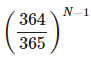. The probability that at least one person shares the same birthday as Trudy is 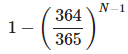. 
To find the minimum of N such that the probability is over 50% would be 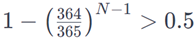, which then becomes 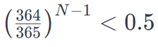.
To find the minimum N using manual math, we would start from N = 1 until the condition is satisfied. The smallest N that would satisfy this condition is 254, where N – 1 (254 – 1) = 253, and  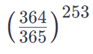 = 0.49952284596.

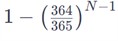

## Q3 
> What is the probability that any two (or more) people in a room share the same birthday, where there are N people (N<=365) in the room? What is the minimum number of N such that the chance is over 50%?

For N people, the probability of no one sharing the same birthday is 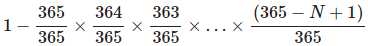. Setting that to 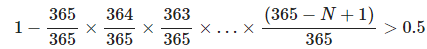, we can find the minimum N where the probability of at least two people in the room that share the same birthday. Starting from N = 1 and incrementing N by 1 each time, we can eventually find the answer. The birthday paradox states that there is a 50-50 change of at least two people having the same birthday in a room of just 23 people.

## Q4
> What is the main idea behind the birthday attack on hash? How can a birthday attack improve the efficiency of an attack compared to a naive brute force attack?

The main idea behind the birthday attack on hash is the same as the birthday paradox. It aims to exploit the higher probability of hash collisions instead of trying to find a specific collision as it is much easier and faster to find any two hash values that collide. This is the same idea as: it is more likely to find two people with the same birthday in a group than trying to find someone who shares a specific birthday.

## Q5 
> What is the main potential issue for hash function that is constructed using Merkle-Damagurd Construction process?


The main issue with hash functions constructed using the Merkle-Damgard construction is that they are susceptible to length extension attacks. The Merkle-Damgard construction processes the input in fixed-size blocks and uses the output of the previous block as an input for the next. A new message with the same hash value can be generated by using the hash value of the message and the length of the message. In other words, an attacker who knows the hash of a message and its length can generate the same hash with additional data appended without knowing the entire original message. Data could be tampered with but still look unchanged. 

## Q6 
> (optional) Open discussion on the main theme of the project: can we predict the future?


Some prediction is possible as we can certainly make good guesses based on patterns or past events or known values, especially with the help of technology, but it is not perfect. However, based on the main theme of the project, or in terms of hash functions, they are designed to be unpredictable, wherein any small change in the input will produce a completely different output. If we want to predict the hash of a specific input, it would be nearly impossible. This goes the same for trying to predict the input of a hash function as they are designed to be irreversible, unless successfully brute-forced. However, that has nothing to do with predictions. 

# III: Code Project 

## 1. Merkel tree implementation
 
### a.

> Use SHA256 or any other hash algorithms in Merkle trees. You do not need to implement hash algorithms unless you want to. Explore crypto packages such as pycryptodome. Most of them shall have the implementation


In [3]:
from hashlib import sha256
from typing import List, Optional
from IPython.display import Markdown
from project6.mermaid import Mermaid

class Node:
    left: Optional["Node"] = None
    right: Optional["Node"] = None
    parent: Optional["Node"] = None
    _value: Optional[str] = None

    def __init__(self, value: Optional[str] = None):
        self._value = value

    @property
    def digest(self) -> bytes:
        m = sha256()
        if self.left is not None and self.right is not None:
            m.update(self.left.digest)
            m.update(self.right.digest)
        else:
            assert self._value is not None
            m.update(self._value.encode())

        return m.digest()

    @property
    def value(self):
        return self.digest.hex()[:8]


class Tree:
    @staticmethod
    def build(nodes: List[Node]):
        n = len(nodes)
        for i in range(n):
            if i * 2 + 1 < n:
                nodes[i].left = nodes[i * 2 + 1]
                nodes[i * 2 + 1].parent = nodes[i]
            if i * 2 + 2 < n:
                nodes[i].right = nodes[i * 2 + 2]
                nodes[i * 2 + 2].parent = nodes[i]
        return nodes[0]


### b.
> Each leaf node points to a plain text file. The text file can have any contents.

NOTE: We opted for just using strings instead of files to make the code simpler - since files would just end up as binary anyway.

In [21]:
four_leaves = [
    Node(),
    Node(),
    Node(),
    Node('A'),
    Node('B'),
    Node('C'),
    Node('D'),
]
six_leaves = [
    Node(),
    Node(),
    Node(),
    Node(),
    Node(),
    Node(),
    Node(),
    Node('A'),
    Node('B'),
    Node('C'),
    Node('D'),
    Node('E'),
    Node('F'),
    Node('E'),
    Node('F'),
]

root_four_leaves = Tree.build(four_leaves)
root_six_leaves = Tree.build(six_leaves)

In [22]:
Markdown(f"""
### c.
         
> Test case 1 with four leaf nodes. Print out the tree structure and the corresponding hashes

![root_four_leaves]({Mermaid.render_binary_search_tree(root_four_leaves).to_url()})
""")


### c.
         
> Test case 1 with four leaf nodes. Print out the tree structure and the corresponding hashes

![root_four_leaves](https://mermaid.ink/img/CmZsb3djaGFydCBURAoKX1JPT1RbMWIzZmFhM2ZCXQpfUk9PVFsxYjNmYWEzZkJdIC0tPiBfUk9PVC1MMVs2Mzk1NmYwY0JdCl9ST09ULUwxWzYzOTU2ZjBjQl0gLS0+IF9ST09ULUwxLUwyWzU1OWFlYWQwICdBJ10KX1JPT1QtTDFbNjM5NTZmMGNCXSAtLT4gX1JPT1QtTDEtUjJbZGY3ZTcwZTUgJ0InXQpfUk9PVFsxYjNmYWEzZkJdIC0tPiBfUk9PVC1SMVs5OGEyZmJmZEJdCl9ST09ULVIxWzk4YTJmYmZkQl0gLS0+IF9ST09ULVIxLUwyWzZiMjNjMGQ1ICdDJ10KX1JPT1QtUjFbOThhMmZiZmRCXSAtLT4gX1JPT1QtUjEtUjJbM2YzOWQ1YzMgJ0QnXQo=)


In [23]:

Markdown(f"""
### d.

> Test case 2 with six leaf nodes. Print out the tree structure and the corresponding hashes.
         
![root_six_leaves]({Mermaid.render_binary_search_tree(root_six_leaves).to_url()})
""")


### d.

> Test case 2 with six leaf nodes. Print out the tree structure and the corresponding hashes.
         
![root_six_leaves](https://mermaid.ink/img/CmZsb3djaGFydCBURAoKX1JPT1RbODBkYTBmN2RCXQpfUk9PVFs4MGRhMGY3ZEJdIC0tPiBfUk9PVC1MMVsxYjNmYWEzZkJdCl9ST09ULUwxWzFiM2ZhYTNmQl0gLS0+IF9ST09ULUwxLUwyWzYzOTU2ZjBjQl0KX1JPT1QtTDEtTDJbNjM5NTZmMGNCXSAtLT4gX1JPT1QtTDEtTDItTDNbNTU5YWVhZDAgJ0EnXQpfUk9PVC1MMS1MMls2Mzk1NmYwY0JdIC0tPiBfUk9PVC1MMS1MMi1SM1tkZjdlNzBlNSAnQiddCl9ST09ULUwxWzFiM2ZhYTNmQl0gLS0+IF9ST09ULUwxLVIyWzk4YTJmYmZkQl0KX1JPT1QtTDEtUjJbOThhMmZiZmRCXSAtLT4gX1JPT1QtTDEtUjItTDNbNmIyM2MwZDUgJ0MnXQpfUk9PVC1MMS1SMls5OGEyZmJmZEJdIC0tPiBfUk9PVC1MMS1SMi1SM1szZjM5ZDVjMyAnRCddCl9ST09UWzgwZGEwZjdkQl0gLS0+IF9ST09ULVIxWzg0MDA4NmY0Ql0KX1JPT1QtUjFbODQwMDg2ZjRCXSAtLT4gX1JPT1QtUjEtTDJbZWE3MzdkYzZCXQpfUk9PVC1SMS1MMltlYTczN2RjNkJdIC0tPiBfUk9PVC1SMS1MMi1MM1thOWY1MTU2NiAnRSddCl9ST09ULVIxLUwyW2VhNzM3ZGM2Ql0gLS0+IF9ST09ULVIxLUwyLVIzW2Y2N2FiMTBhICdGJ10KX1JPT1QtUjFbODQwMDg2ZjRCXSAtLT4gX1JPT1QtUjEtUjJbZWE3MzdkYzZCXQpfUk9PVC1SMS1SMltlYTczN2RjNkJdIC0tPiBfUk9PVC1SMS1SMi1MM1thOWY1MTU2NiAnRSddCl9ST09ULVIxLVIyW2VhNzM3ZGM2Ql0gLS0+IF9ST09ULVIxLVIyLVIzW2Y2N2FiMTBhICdGJ10K)


## 2. Root hash Observation
> Under four leaf node case, alter one of the text file that is pointed by one of the leaf node. Alter here means you change the context of the file. Compare the root hash with the one with original root hash. What can you say about and why?

Any changes to any of the node's value, will result in any parent nodes, as well as the root node, being changed as well. This is because all children hash changes bubble-up, as a node hash is the resulting hash of the concatention of both of it's children's hashes. In the case of no children, the node's value itself is hashed, wherein any changes to said value will change the hash, which then propagates upwards to all nodes of the same subtree.

In [24]:
four_leaves = [
    Node(),
    Node(),
    Node(),
    Node('Z'),
    Node('B'),
    Node('C'),
    Node('D'),
]

root_four_leaves = Tree.build(four_leaves)

In [25]:
Markdown(f"""
### 4 Leaf Nodes with change

`A` has been changed to `Z`. Root hash is now `81205ce6` instead of `1b3faa3f`.

![root_four_leaves]({Mermaid.render_binary_search_tree(root_four_leaves).to_url()})
""")


### 4 Leaf Nodes with change

`A` has been changed to `Z`. Root hash is now `81205ce6` instead of `1b3faa3f`.

![root_four_leaves](https://mermaid.ink/img/CmZsb3djaGFydCBURAoKX1JPT1RbODEyMDVjZTZCXQpfUk9PVFs4MTIwNWNlNkJdIC0tPiBfUk9PVC1MMVswYzg3NDkyY0JdCl9ST09ULUwxWzBjODc0OTJjQl0gLS0+IF9ST09ULUwxLUwyW2JiZWViZDg3ICdaJ10KX1JPT1QtTDFbMGM4NzQ5MmNCXSAtLT4gX1JPT1QtTDEtUjJbZGY3ZTcwZTUgJ0InXQpfUk9PVFs4MTIwNWNlNkJdIC0tPiBfUk9PVC1SMVs5OGEyZmJmZEJdCl9ST09ULVIxWzk4YTJmYmZkQl0gLS0+IF9ST09ULVIxLUwyWzZiMjNjMGQ1ICdDJ10KX1JPT1QtUjFbOThhMmZiZmRCXSAtLT4gX1JPT1QtUjEtUjJbM2YzOWQ1YzMgJ0QnXQo=)


## 3. Hash Collision


### a.

>Take any one text file that is attached to one leaf node, Generate as many text files as possible with the same meaning. For example, adding more spaces to the file that does not change the meaning of the file but should generate different hash. You may try 8 files first. Test your luck if you can find a hash collision.


In [4]:
initial_val = 'INITIALTEXTFILE'
one_leaf = [
    Node(),
    Node(initial_val),
    Node(initial_val),
]
root_one_leaf = Tree.build(one_leaf)
original_val = root_one_leaf.left.value

# will just hash changed values directly as they will show the same values
full_initial_val = sha256(initial_val.encode()).hexdigest()[:8]
assert(original_val == full_initial_val[:8])

# add variable amount of spaces
with_one_space = sha256((initial_val + ' ').encode()).hexdigest()[:8]
assert(with_one_space != full_initial_val)
with_two_spaces = sha256((initial_val + (' ' * 2)).encode()).hexdigest()[:8]
assert(with_one_space != with_two_spaces) #even adding different amounts of spaces changes the hash value

# with tabs 
with_one_tab = sha256((initial_val + '\t').encode()).hexdigest()[:8]
assert(with_one_tab != full_initial_val)
with_two_tabs = sha256((initial_val + ('\t' * 2)).encode()).hexdigest()[:8]
assert(with_one_tab != with_two_tabs) #even adding different amounts of tabs changes the hash value

# with new lines
with_new_line = sha256((initial_val + '\n').encode()).hexdigest()[:8]
assert(with_new_line != full_initial_val)
with_two_new_lines = sha256((initial_val + ('\n' * 2)).encode()).hexdigest()[:8]
assert(with_new_line != with_two_new_lines) #even adding different amounts of new lines changes the hash value

# with null
with_null = sha256(initial_val.encode() + b'\x00').hexdigest()[:8]
assert(with_null != full_initial_val)
with_two_nulls = sha256(initial_val.encode() + (b'\x00' * 2)).hexdigest()[:8]
assert(with_null != with_two_nulls) #even adding different amounts of nulls (invisible control characters) changes the hash value


### b.

>In general, with hash256, it is rarely luck to find a collision. Even changing the hash to a weak one, say MD4, you still could not find hash collision unless you are using specific techniques like rho method or herding. Again, no collision found is expected. For the class project, we can reduce the hash output length to 4-bit hash. You know how many files you need to generate so as to find collision with naïve exhaustive attack. Demo the result.


In [5]:
from Crypto.Hash import MD4

# Test with MD4

# will just hash changed values directly as they will show the same values
full_initial_val_md4 = MD4.new(initial_val.encode()).hexdigest()[:8]

# add variable amount of spaces
with_one_space_md4 = MD4.new((initial_val + ' ').encode()).hexdigest()[:8]
assert(with_one_space_md4 != full_initial_val_md4)
with_two_spaces_md4 = MD4.new((initial_val + (' ' * 2)).encode()).hexdigest()[:8]
assert(with_one_space_md4 != with_two_spaces_md4) #even adding different amounts of spaces changes the hash value

# with tabs 
with_one_tab_md4 = MD4.new((initial_val + '\t').encode()).hexdigest()[:8]
assert(with_one_tab_md4 != full_initial_val_md4)
with_two_tabs_md4 = MD4.new((initial_val + ('\t' * 2)).encode()).hexdigest()[:8]
assert(with_one_tab_md4 != with_two_tabs_md4) #even adding different amounts of tabs changes the hash value

# with new lines
with_new_line_md4 = MD4.new((initial_val + '\n').encode()).hexdigest()[:8]
assert(with_new_line_md4 != full_initial_val_md4)
with_two_new_lines_md4 = MD4.new((initial_val + ('\n' * 2)).encode()).hexdigest()[:8]
assert(with_new_line_md4 != with_two_new_lines_md4) #even adding different amounts of new lines changes the hash value

# with null
with_null_md4 = MD4.new(initial_val.encode() + b'\x00').hexdigest()[:8]
assert(with_null_md4 != full_initial_val_md4)
with_two_nulls_md4 = MD4.new(initial_val.encode() + (b'\x00' * 2)).hexdigest()[:8]
assert(with_null_md4 != with_two_nulls_md4) #even adding different amounts of nulls (invisible control characters) changes the hash value


In [6]:
# Brute force 4 digit hash
import random
import string

initial_md4_4_digit = full_initial_val_md4[:4]
for rand_iteration in range(65536):
    text = ''.join(random.choices(string.ascii_uppercase + string.digits, k=5))
    this_round_hash = MD4.new(text.encode()).hexdigest()[:4]
    if this_round_hash == initial_md4_4_digit:
        print("found collision:", this_round_hash, initial_md4_4_digit, text)
        break


found collision: a303 a303 BY5KA


### c.
> Short discuss if you have 8-bit hash all the way to 160-bit hash what your strategy would be to get possible collision
- The best way to get a collision would still be to brute force it. For each bit hash of increasing length, we would need to increase the number of attempts such that we could anticipate getting at least one collision. Using the birthday paradox math, in order to have a 50% change at a collision would require approximately N/2 attempts (where N is the length of bits of the hash), leading to around `2`<sup>`4`</sup> attempts for an 8 bit hash, up to `2`<sup>`80`</sup> attempts for a 160 bit hash

## 4. Hash Puzzle

### a.

> Stick with the hash algorithm you used in 1), practice so called hash puzzle. It is basicallyfinding certain hash that satisfies a set condition. For example, the first 8 bits (prefix-) must be zero. Once you find two hashes having the same prefix zeros, you can say you find the collision. In this project, you start with puzzle having 1-bit zero in the beginning, increase to 4-bit zero. Demo the result and explain for the worst cases how many hashes you need to generate.

In [395]:
def find_hash_puzzle_solution(num_zeros):
    two_solutions = []
    count = 0


    while len(two_solutions) != 2:
        count += 1
        text = ''.join(random.choices(string.ascii_uppercase + string.digits, k=5))
        this_round_hash = sha256(text.encode()).hexdigest()[:num_zeros]
        if this_round_hash == ('0' * num_zeros):
            two_solutions.append(text)
            print(f'found one solution with {num_zeros} target zeros', text)

find_hash_puzzle_solution(1)
find_hash_puzzle_solution(4)

found one solution with 1 target zeros S7V83
found one solution with 1 target zeros 7LU9F
found one solution with 4 target zeros 6TPSW
found one solution with 4 target zeros HQ1L8


#### Worst case scenario:

In the worst case for the first character to be $0$, we'd need to generate $16$ hashes before finding a collision. This is because there are $16$ possible options for a hex character.

$$
\begin{align}
P &= \frac{1}{16} \\
\text{Number of hashes} &= \frac{1}{P} = 16
\end{align}
$$

In the worst case for the first four characters to be $0000$, we'd need $65536$ hashes to find a collision. 

$$
\begin{align}
P &= (\frac{1}{16})^4 \\
\text{Number of hashes} &= \frac{1}{P} = 65536
\end{align}
$$

However, this assumes that the hash output would be uniform, which it is not. It's likely that it could take more than the probability given above.

### b.

> Reason briefly the workload if we want to solve a puzzle with enough zeros in front say 20


Assuming a hex character string of length $n$. The total number of characters available in hex is 16 e.g. 0-9 A-F. We define $H$ as the set of all combinations of the character string of $n$ length. A sha256 hash is 64 hex characters, so we set $n$ to $64$.

$$
\begin{align}
n &= 64 \\
H &= 16^{n} = 16^{64} = 2^{256} = 1.157920892 \times 10^{77}
\end{align}
$$

We want $r$ number of characters to be repeated consecutively at the beginning of the string. For every $r$, we reduce the number of combinations available. If $r=4$, then we'd reduce the total number of combinations: 

$$
\begin{align}
r &= 4 \\
R &= 16^{n-r} = 16^{64-4} = 16^{60} \\
R &\subset H
\end{align}
$$

This can be verified more easily by reducing $n$ to $4$ and $r$ to $2$. We want $r$ to be two characters that repeat - for example $"00"$

$$
\begin{align}
n &= 4 \\
r &= 2 \\
H &= 16^{n} = \text{65536 combinations} \\
R &= 16^{n-r} = \text{256 combinations} \\
R &\subset H \\

&\therefore \text{There are 256 possible strings that begin with "00" out of H}
\end{align}
$$

Going back to the possible sha256 hashes:

$$
\begin{align}
n &= 64 \\
H &= 16^{n} = 1.157920892 \times 10^{77}
\end{align}
$$

We want $r$ to now be a $20$ character string that begins with something like $"00000000000000000000"$:

$$
\begin{align}
r &= 20 \\
R &= 16^{n-r} = 16^{44} = 9.57809713 \times 10^{52} \\
R &\subset H \\
&\therefore \text{There are } 16^{44} \text{ possible strings that begin with "00000000000000000000" out of H}
\end{align}
$$

However, $16^{44} \approx 8.27 \times 10^{-27}\text{\%}$ of $16^{64}$ which makes it very hard to find a hash collision.

Given adequate computational capacity, the formula for calculating the number of hashes $h$ needed to achieve a 50% probabilty of a collision would be:

$$
h \approx \sqrt{2R \ln(1-0.5)} = \sqrt{2({16^{44}}) \ln(0.5)}
$$

And in the worst case, with the previous problem's formula, we'd need around $1.21 \times 10^{24}$ hashes to find a collision.

$$
\begin{align}
P &= (\frac{1}{16})^{20} \\
\text{Number of hashes} &= \frac{1}{P} = 1.21 \times 10^{24}
\end{align}
$$